# HW3.

by Handan Cetin | USCID: 6074572947 | github: handancetin

In [1]:
import os
import csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample

import random
random.seed(1234) # for reproducibility

import warnings
warnings.filterwarnings('ignore') # for plots

## 1. Time Series Classification Part 1: Feature Creation/Extraction
An interesting task in machine learning is classification of time series. In this problem,
we will classify the activities of humans based on time series obtained by a Wireless
Sensor Network

### 1.(a) Download the AReM data 
The dataset contains 7 folders that represent seven types of activities. In
each folder, there are multiple files each of which represents an instant of a human
performing an activity.1 

Each file contains 6 time series collected from activities of the same person, which are called 
* avg_rss12 
* var_rss12 
* avg_rss13 
* var_rss13
* avg_rss23
* var_rss23 

There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

In [2]:
filepath = '../data/AReM/'

### 1.(b) Test and Train data division
* Test: datasets 1 and 2 in bending1 and bending2, and datasets 1, 2, and 3 in other folders
* Train: remaining datasets

In [3]:
trainFiles = []
testFiles  = []
fileCounter = 0
# Loop through each file in the folders
for root, dir, file in os.walk(filepath):
    for f in file:       
        fpof = os.path.join(root, f)
        if 'bending' in fpof:
            if ('dataset1' in fpof) or ('dataset2' in fpof):
                testFiles.append(fpof)
            else:
                trainFiles.append(fpof)
        else:
            if ('dataset1' in fpof) or ('dataset2' in fpof) or ('dataset3' in fpof):
                testFiles.append(fpof)
            else:
                trainFiles.append(fpof)
        fileCounter = fileCounter + 1

print('Out of total', fileCounter, 'files:', len(trainFiles), 'datasets added to training list, and',  len(testFiles), 'datasets added to testing list.')

Out of total 88 files: 39 datasets added to training list, and 49 datasets added to testing list.


### 1.(c) Feature Extraction
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features

#### 1.(c)i. Research what types of time-domain features are usually used in time series classification. List them.

**Statistical Measures:**
- Mean
- Median
- Standard deviation
- Variance
- Skewness
- Kurtosis
- Higher-order moments (e.g., third and fourth moments)
- Various percentiles (e.g., 25th, 75th)
- Minimum and maximum values
- Range (difference between max and min)
- Mode (most frequent value)
- Rolling statistics (Rolling mean, standard deviation, etc.)
- Autocorrelation at different lags
- Cross-correlation with other relevant time series
- Slope (linear regression coefficients, etc)

**Time Series Characteristics:**
- Length of time series
- Number of data points
- Trend, seasonal, or residual components
- Entropy neasures (Shannon entropy, Spectral entropy, Permutation entropy, Sample entropy, etc.)
- Time-domain representation of frequency domain features like dominant frequency or peak frequency
- Central moments (e.g., second, third, and fourth central moments)
- Histograms of the time series values
- Shape-based features like fractal dimensions
- Time Series Amplitude and Time Derivatives (Amplitude variations, derivatives, etc.)
- Lagged values or differences at different time intervals
- Autoregressive coefficients
- Moving Average coefficients


#### 1.(c)ii. Extract the time-domain features 
minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance

In [4]:
trainingSet = []
testingSet = []
for exp in ['train', 'test']:
    if exp == 'train' :  
        files = trainFiles
    else:                
        files = testFiles

    values  = []
    folderName = []
    
    # Read each file and keep the folder name
    for f in files:
        filename_components = os.path.dirname(f).split("/")
        folderName.append(filename_components[-1])

        # bending2/dataset4 is not comma-seperated, so this part is required
        separator = csv.Sniffer().sniff(open(f).read()).delimiter
        if separator == ",":
            fc = pd.read_csv(f, skiprows=5, header=None, on_bad_lines='skip') 
        else:
            fc = pd.read_csv(f, skiprows=5, sep="\\s+", header=None, on_bad_lines='skip')

        fc.columns = ['time','avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
         
        values.append(fc.describe().drop('count').drop(columns='time').T.values.flatten())
        

In [5]:
trainingSet = []
testingSet = []
for exp in ['train', 'test']:
    if exp == 'train' :  
        files = trainFiles
    else:                
        files = testFiles

    values  = []
    folderName = []
    
    # Read each file and keep the folder name
    for f in files:
        filename_components = os.path.dirname(f).split("/")
        folderName.append(filename_components[-1])

        # bending2/dataset4 is not comma-seperated, so this part is required
        separator = csv.Sniffer().sniff(open(f).read()).delimiter
        if separator == ",":
            fc = pd.read_csv(f, skiprows=5, header=None, on_bad_lines='skip') 
        else:
            fc = pd.read_csv(f, skiprows=5, sep="\\s+", header=None, on_bad_lines='skip')

        fc.columns = ['time','avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
        values.append(fc.describe().drop('count').drop(columns='time').T.values.flatten())
            
    # Generate statistics
    df = pd.DataFrame(values)
    statNames = []
    for s in range(1, 7):
        for stat in ['mean', 'std', 'min', '1st quart', 'median', '3rd quart', 'max']:
            statNames.append(f'{stat} ({s})')
    df.columns = statNames

    # add activity column
    df['activity'] = pd.Series(folderName)

    # Save the dataframes
    if exp == 'train' :  
        trainingSet = df
    else:                
        testingSet  = df
        
trainingSet['isTraining'] = True
testingSet['isTraining'] = False

In [6]:
allData = pd.concat([trainingSet, testingSet])
allData

,mean (1),std (1),min (1),1st quart (1),median (1),3rd quart (1),max (1),mean (2),std (2),min (2),...,max (5),mean (6),std (6),min (6),1st quart (6),median (6),3rd quart (6),max (6),activity,isTraining
0,43.969125,1.618364,36.25,43.310,44.50,44.6700,48.00,0.413125,0.263111,0.0,...,30.75,0.555312,0.487826,0.0,0.0000,0.49,0.8300,2.96,bending1,True
1,43.454958,1.386098,37.00,42.500,43.25,45.0000,48.00,0.378083,0.315566,0.0,...,33.50,0.679646,0.622534,0.0,0.4300,0.50,0.8700,5.26,bending1,True
2,42.179812,3.670666,33.00,39.150,43.50,45.0000,47.75,0.696042,0.630860,0.0,...,38.67,0.613521,0.524317,0.0,0.0000,0.50,1.0000,2.18,bending1,True
3,41.678063,2.243490,33.00,41.330,41.75,42.7500,45.75,0.535979,0.405469,0.0,...,37.50,0.383292,0.389164,0.0,0.0000,0.43,0.5000,1.79,bending1,True
4,43.954500,1.558835,35.00,43.000,44.33,45.0000,47.40,0.426250,0.338690,0.0,...,38.50,0.493292,0.513506,0.0,0.0000,0.43,0.9400,1.79,bending1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,36.541667,4.018922,27.00,33.250,36.00,39.8125,44.33,2.847958,1.892397,0.0,...,24.50,3.225458,1.769758,0.0,1.8850,2.87,4.2625,9.18,cycling,False
45,35.879875,4.614878,19.00,33.000,36.00,39.5000,43.75,3.414312,2.237955,0.0,...,26.50,3.093021,1.626034,0.0,1.8900,2.93,4.0600,8.50,cycling,False
46,35.752354,4.614802,18.50,33.000,36.00,39.3300,44.25,3.328104,2.140576,0.0,...,24.33,3.069667,1.748326,0.0,1.7975,2.77,4.0600,9.39,cycling,False
47,37.177042,3.581301,24.25,34.500,36.25,40.2500,45.00,2.374208,1.601799,0.0,...,25.50,2.921729,1.852600,0.0,1.5000,2.50,3.9000,9.34,cycling,False


#### 1.(c)iii. Estimate the standard deviation of each of the time-domain features you extracted from the data

In [7]:
stdTable = pd.DataFrame({ "Standart Deviation of Statistics": allData.describe().loc['std'].index, 
                          "All Data"  : allData.describe().loc['std'].values,
                          "Train Set Only" : trainingSet.describe().loc['std'].values, 
                          "Test Set Only"  : testingSet.describe().loc['std'].values})
stdTable

,Standart Deviation of Statistics,All Data,Train Set Only,Test Set Only
0,mean (1),5.335700,4.850250,5.737933
1,std (1),1.772185,1.854324,1.721256
2,min (1),9.569975,9.077137,10.037780
3,1st quart (1),6.153874,5.957810,6.366662
4,median (1),5.440054,5.011517,5.809848
5,3rd quart (1),5.138925,4.653297,5.534215
6,max (1),4.394362,3.962409,4.731086
7,mean (2),1.574198,1.518276,1.628452
8,std (2),0.884137,0.866277,0.906096
9,min (2),0.000000,0.000000,0.000000


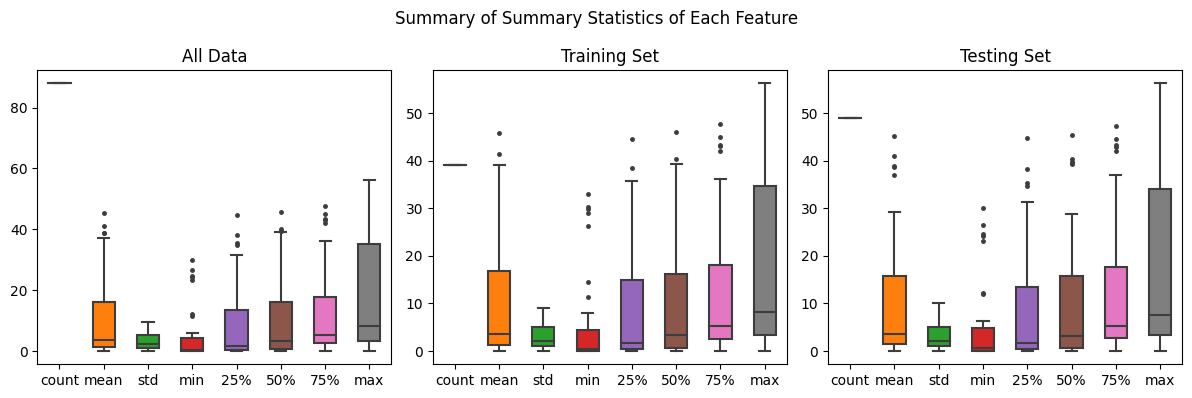

In [8]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12,4) 

sns.boxplot(allData.describe().T, saturation = 1, ax = axes[0],
                width=0.5, flierprops = dict(marker = '.'))
axes[0].set_title('All Data')

sns.boxplot(trainingSet.describe().T, saturation = 1, ax = axes[1],
                width=0.5, flierprops = dict(marker = '.'))
axes[1].set_title('Training Set')

sns.boxplot(testingSet.describe().T, saturation = 1, ax = axes[2],
                width=0.5, flierprops = dict(marker = '.'))
axes[2].set_title('Testing Set')

plt.suptitle('Summary of Summary Statistics of Each Feature')
plt.tight_layout(pad = 1)
plt.show()

#### 1.(c)iii. (cont.) Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [9]:
bootstrappedSet = []
for sample in range(1000):
    resampled = resample(allData.iloc[:, :-2]) # Bootstrapping excluding the activity and isTraining columns
    bootstrappedSet.append(resampled.apply(lambda col: np.std(col)))

bootstrappedSet = pd.DataFrame(bootstrappedSet)
bootstrappedSet.columns = list(allData.columns[:-2])
confInterval = bootstrappedSet.apply(lambda col : (np.percentile(col, 5), np.percentile(col, 95)), axis=0).apply(np.around, args=(2,)).T
confInterval.columns = ['lower bound', 'higher bound']
confInterval['CI range'] = confInterval['higher bound']-confInterval['lower bound']
confInterval

,lower bound,higher bound,CI range
mean (1),4.69,5.85,1.16
std (1),1.56,1.94,0.38
min (1),8.20,10.67,2.47
1st quart (1),5.58,6.59,1.01
median (1),4.81,5.94,1.13
3rd quart (1),4.30,5.82,1.52
max (1),3.37,5.34,1.97
mean (2),1.38,1.69,0.31
std (2),0.80,0.93,0.13
min (2),0.00,0.00,0.00


#### 1.(c)iv. Use your judgement to select the three most important time-domain features

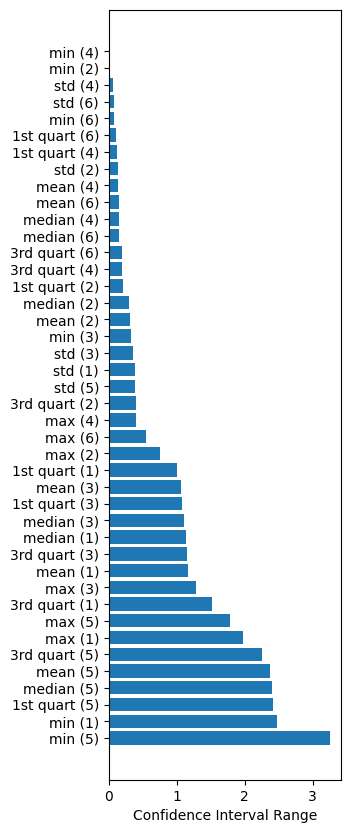

In [10]:
CIRange = confInterval.sort_values(by=['CI range'])['CI range']
fig, ax = plt.subplots()
fig.set_size_inches(3,10)
ax.barh(range(len(CIRange)), CIRange)
ax.set_yticks(range(len(CIRange)))
ax.set_yticklabels(CIRange.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Confidence Interval Range')
plt.show()

I would choose the three most important features by looking at the width of the confidence intervals for each feature as narrower intervals would indicate higher confidence in the estimation. However, this selection would not work in case of overlapping distributions. 

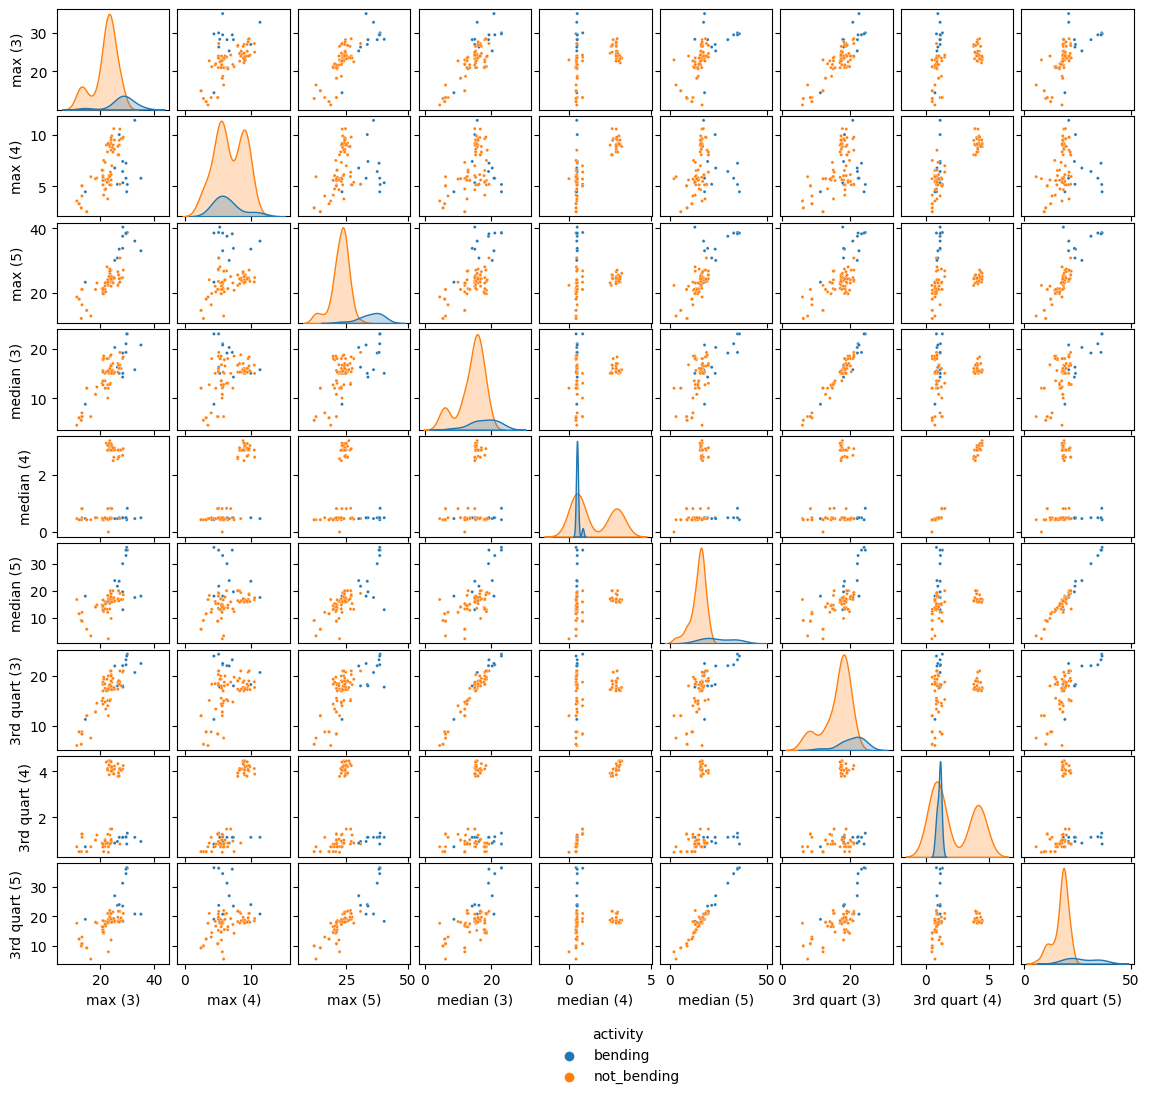

In [11]:
# 'activity' labels as binary classification: 1 if from bending datasets, 0 otherwise.
dataSet = allData.copy()
dataSet['activity'] = np.where(dataSet['activity'].str.contains('bending'), 'bending', 'not_bending')

dataSubset = dataSet[['max (3)',       'max (4)',       'max (5)', 
                      'median (3)',    'median (4)',    'median (5)',
                      '3rd quart (3)', '3rd quart (4)', '3rd quart (5)', 
                      'activity']]
# visualize scatter plots for the features of avg_rss13, var_rss13, avg_rss23.
p = sns.pairplot(data = dataSubset, kind = 'scatter', hue='activity', grid_kws={'despine' : False}, plot_kws={"s": 5})
p.fig.set_size_inches(12,10)
sns.move_legend(p, "lower center", bbox_to_anchor=(0.5, -0.1))

After looking at the various combinations of pairwise scatter plots, I chose the features with relatively clearer seperation:

* max
* median
* 3rd quartile


## 2. ISLR 3.7.4

**Question:** I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β_0 + β_1 X + β_2 X^2 + β_3 X^3 + ε.



**(a)** Suppose that the true relationship between X and Y is linear, i.e. Y = β_0 + β_1 X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

* **Answer:** *If we assume that the true relationship is linear, the linear regression model should provide a good fit to the training data. However, we can expect training RSS with cubic regression model be relatively lower than the linear regression model, since the cubic regression is more flexible and may overfit to the data that we are training the model. Another possibility is that, if the relationship is truly linear (without outliers), the cubic regression model would set nonlinear coefficients (for example β_3) close to zero.*


**(b)** Answer (a) using test rather than training RSS.

* **Answer:** *We would expect the testing RSS with liner regression model be lower than the cubic regression model. Although the cubic regression may capture some nonlinear patterns due to its flexibity, it might introduce unnecessary complexity that doesn't improve the model's fit. The linear model is definitely a more appropriate choice when the true relationship is linear.*


**(c)**  Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

* **Answer:** *Similar scenerio as in (a): We would expect training RSS with cubic regression to be lower than the linear regression model as the cubic regression model would capture the flexibility in the training data.*

**(d)** Answer (c) using test rather than training RSS.

* **Answer:** *There is not enough information to answer this question. The comparison of RSS between linear and cubic regression models depends on the true nature of the data we have. In this scenario, we could try both models to see which one is better fit.*